# Lasso & Ridge Regression

Practicing Lasso & Ridge Regression on rough dataset.
Just to understand the concept !

Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline 
plt.style.use('ggplot') 
import warnings; warnings.simplefilter('ignore')

## Data preparation

In [3]:
df = pd.read_csv('/Users/divyabisht/Desktop/datasetlassoridge.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df.shape

(392, 8)

In [7]:
# df['origin'] = pd.Categorical(df['origin'])
# df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# we have to check whether there are any missing values
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64


## Standardization

 Standardize the features (module: from sklearn.preprocessing import StandardScaler)

In [8]:
#  DataFrame columns to the int32 or 64 dtype
dfs = df.astype('int')


In [9]:
# displays the info
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           392 non-null    int64
 1   cylinders     392 non-null    int64
 2   displacement  392 non-null    int64
 3   horsepower    392 non-null    int64
 4   weight        392 non-null    int64
 5   acceleration  392 non-null    int64
 6   year          392 non-null    int64
 7   origin        392 non-null    int64
dtypes: int64(8)
memory usage: 24.6 KB


In [10]:
# displays all the columns
dfs.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
# StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1.
scaler = StandardScaler()
dfs[['cylinders', 'displacement', 'horsepower', 
     'weight', 'acceleration', 'year', 'origin']] = scaler.fit_transform(dfs[['cylinders', 
                                                                              'displacement', 
                                                                              'horsepower', 
                                                                              'weight', 
                                                                              'acceleration', 
                                                                              'year', 'origin']])

In [12]:

dfs.head(200)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,1.483947,1.077290,0.664133,0.620540,-1.162771,-1.625315,-0.716641
1,15,1.483947,1.488727,1.574594,0.843334,-1.527708,-1.625315,-0.716641
2,18,1.483947,1.182541,1.184397,0.540382,-1.527708,-1.625315,-0.716641
3,16,1.483947,1.048585,1.184397,0.536845,-1.162771,-1.625315,-0.716641
4,17,1.483947,1.029448,0.924265,0.555706,-1.892646,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
195,29,-0.864014,-0.999034,-0.896659,-1.226643,-0.432897,0.005547,0.526382
196,33,-0.864014,-0.989466,-1.338883,-1.394033,0.661914,0.005547,1.769406
197,20,0.309967,0.292688,-0.116263,0.793824,0.661914,0.005547,-0.716641
198,18,0.309967,0.531896,-0.688553,0.703057,2.121662,0.005547,-0.716641


In [13]:
dfs.mean()

mpg             2.328316e+01
cylinders      -1.699321e-16
displacement    4.984675e-17
horsepower     -4.392745e-16
weight          5.607759e-17
acceleration   -1.489738e-16
year           -9.754102e-16
origin          2.883181e-16
dtype: float64

In [14]:
dfs.std()

mpg             7.745896
cylinders       1.001278
displacement    1.001278
horsepower      1.001278
weight          1.001278
acceleration    1.001278
year            1.001278
origin          1.001278
dtype: float64

 Split the data set into train and test sets (use X_train, X_test, y_train, y_test), with the first 75% of the data for training and the remaining for testing. (module: from sklearn.model_selection import train_test_split)

In [15]:

X = dfs.drop(['cylinders'], axis=1) # leaving the cylinder column and assigning to variable x
y = dfs['cylinders']  # assinging cylinder colunm to variable y


In [16]:

from sklearn.model_selection import train_test_split

# we take test data as 25% and training 75% and random state is for giving same result even after running several times
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


## Lasso

In [17]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.5)
# fits in the data
ab=reg.fit(X_train, y_train)


In [18]:
# it is considered as evaluation metrices and tells how perfect ur model is

print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 60.54696039985599
Lasso Regression: R^2 score on test set 59.14924777356131


## Lasso with different lambdas

In [19]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate and .zeroes generate the zeroes , its like initializing
coeff_a = np.zeros((l_num, pred_num))
#print(coeff_a)
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [20]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    #print(coeff_a[ind,:])
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)
    #print(train_r_squared[ind])

## Plot

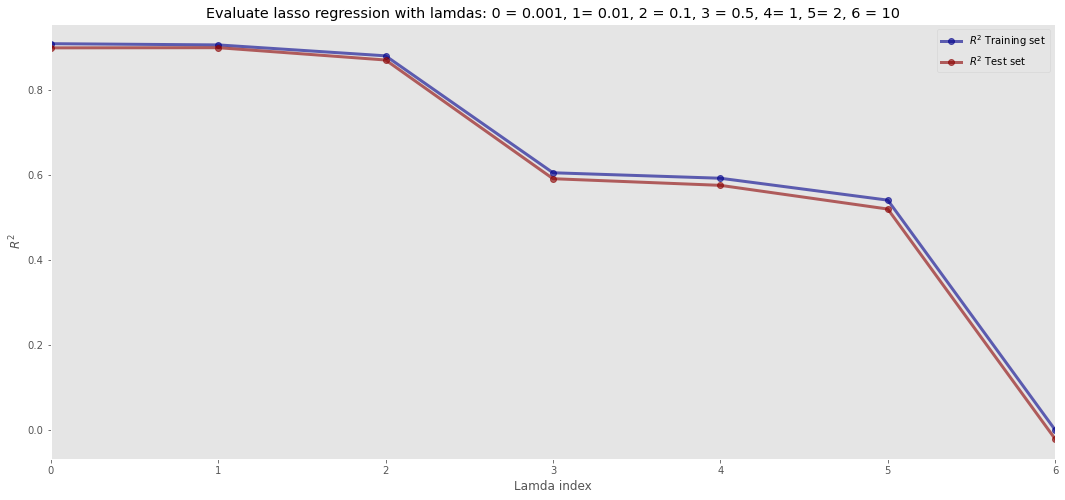

In [21]:
# Plotting of how accuracy varies as lambda value varies
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

## Identifiy best lambda and coefficients

In [22]:
# returns the index of the row where column has maximum value.
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    89.988665
lambda        0.010000
Name: 1, dtype: float64

In [23]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.01)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([-0.0121137 ,  0.86054129, -0.        ,  0.02968984, -0.        ,
        0.02517286,  0.02472341])

In [24]:
# the less mse is the more the accuracy is
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

0.10555681669590934

# RIDGE

In [25]:
from sklearn.linear_model import Ridge

regre = Ridge(alpha=0.5)
# fits in the data
regre.fit(X_train, y_train)


Ridge(alpha=0.5)

In [26]:
# it is considered as evaluation metrices and tells how perfect ur model is

print('Lasso Regression: R^2 score on training set', regre.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', regre.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 90.93176894721641
Lasso Regression: R^2 score on test set 89.89801443737603


## Lasso with different lambdas

In [27]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate and .zeroes generate the zeroes , its like initializing
coeff_aa = np.zeros((l_num, pred_num))
#print(coeff_a)
train_re_squared = np.zeros(l_num)
test_re_squared = np.zeros(l_num)

In [28]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    regre = Ridge(alpha = i)
    regre.fit(X_train, y_train)
       
    coeff_aa[ind,:] = reg.coef_
    #print(coeff_a[ind,:])
    train_re_squared[ind] = regre.score(X_train, y_train)
    test_re_squared[ind] = regre.score(X_test, y_test)
    #print(train_r_squared[ind])

## Plot

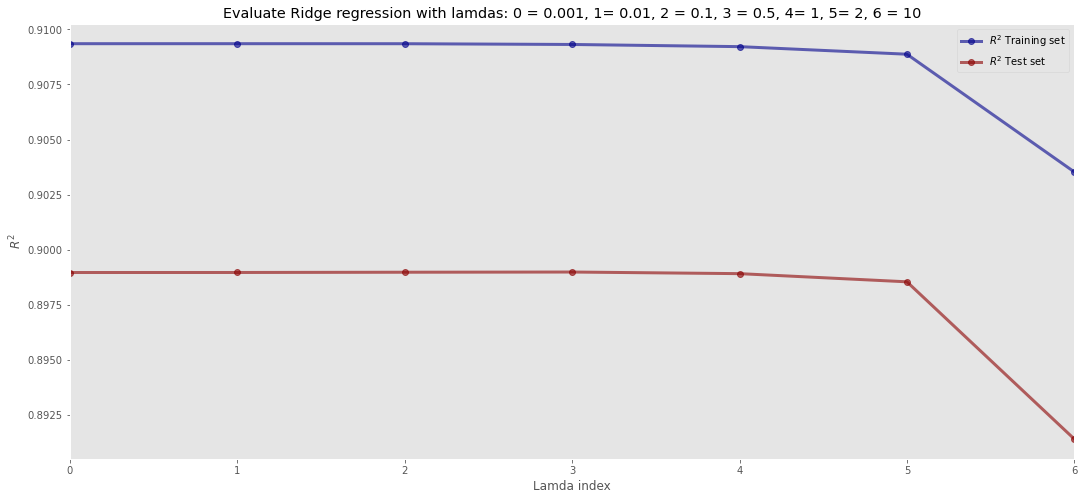

In [29]:
# Plotting of how accuracy varies as lambda value varies
plt.figure(figsize=(18, 8))
plt.plot(train_re_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_re_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Ridge regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

## Identifiy best lambda and coefficients

In [30]:
# returns the index of the row where column has maximum value.
df_lamb = pd.DataFrame(test_re_squared*100, columns=['R_squared'])
df_lamb['lambda'] = (lambdas)
df_lamb.loc[df_lam['R_squared'].idxmax()]

R_squared    89.895971
lambda        0.010000
Name: 1, dtype: float64

In [31]:
# Coefficients of best model
regr_best = Ridge(alpha = 0.5)
regr_best.fit(X_train, y_train)
regr_best.coef_

array([-0.01273259,  0.93313443, -0.14023004,  0.09486654, -0.04429476,
        0.02946939,  0.06223684])

In [32]:
# the less mse is the more the accuracy is
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, regr_best.predict(X_test))

0.10651260853633701